In [1]:
install.packages("tree")
library(tree)
library(MASS) # Carregar o banco de dados
data(Boston)
dados<-Boston
head(Boston)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0.00632,18,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
6,0.02985,0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7


In [2]:
# Particionar o conjunto de dados (treinamento e validação)
set.seed(1)
train=sample(1:nrow(Boston),nrow(Boston)/2)

In [3]:
# Ajuste de uma árvore
mod1<-tree(medv~.,data=dados,subset=train)

#Resumo (Apenas uma variável foi utilizada na contrução da árvore)
summary(mod1)


Regression tree:
tree(formula = medv ~ ., data = dados, subset = train)
Variables actually used in tree construction:
[1] "rm"    "lstat" "crim"  "age"  
Number of terminal nodes:  7 
Residual mean deviance:  10.38 = 2555 / 246 
Distribution of residuals:
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
-10.1800  -1.7770  -0.1775   0.0000   1.9230  16.5800 

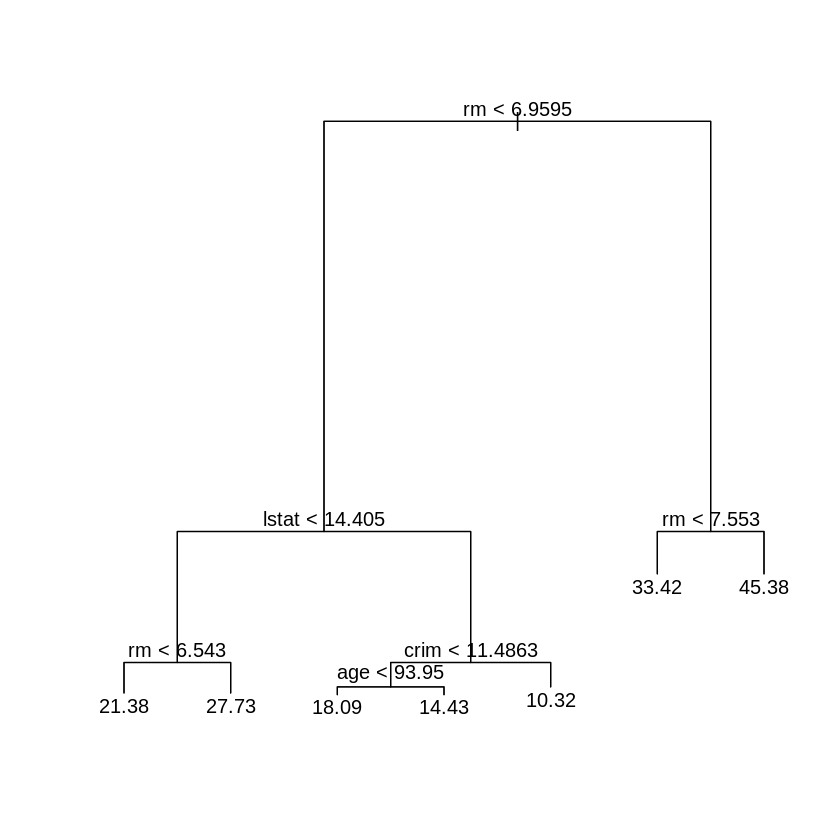

In [4]:
# Apresentação da árvore ajustada
plot(mod1)
text(mod1)


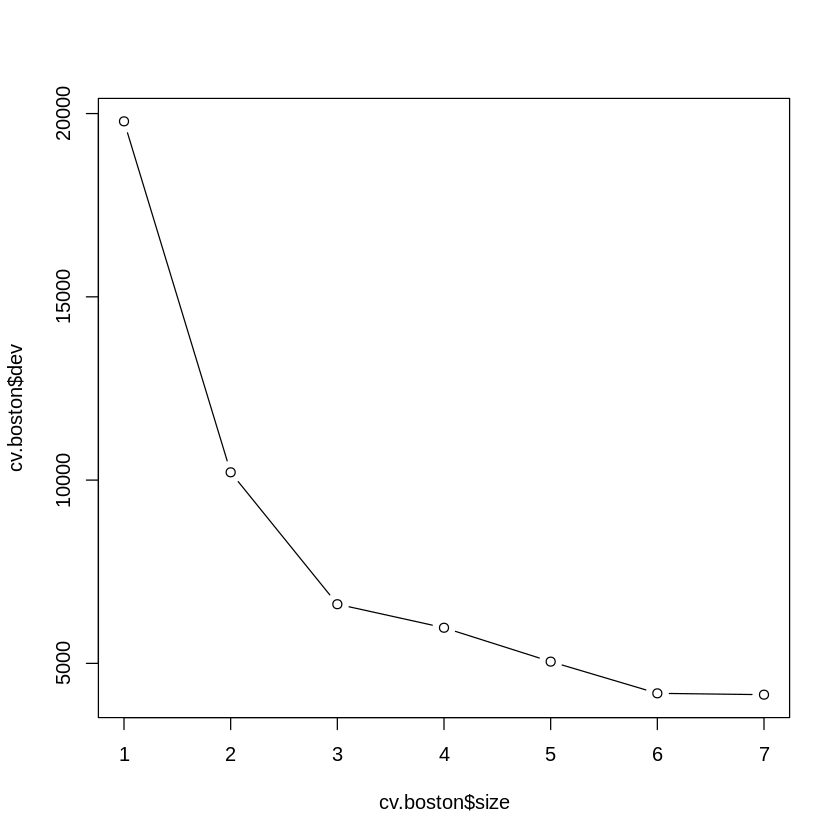

In [5]:
# Verificar se é interessante realizar a poda

#validação cruzada
cv.boston=cv.tree(mod1)


# cv.boston$size -> número de nós terminais da árvore
# cv.boston$dev -> taxa de erro de validação cruzada
# type = 'b'-> cria uma linha de pontos pra facilitar a visualização da tendência
plot(cv.boston$size,cv.boston$dev,type='b')




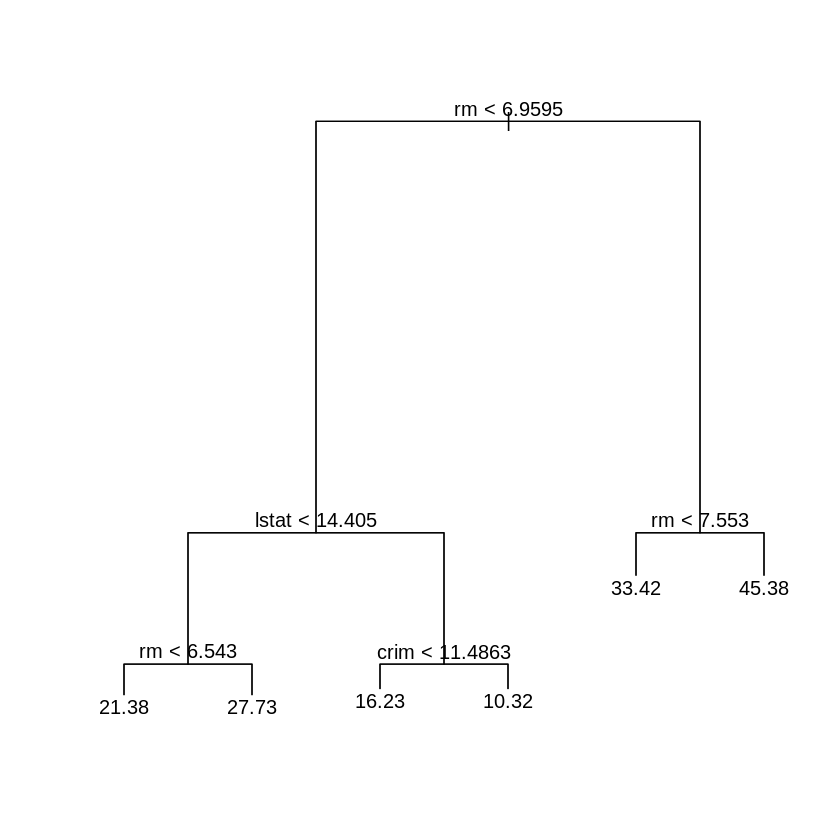

In [6]:
# Se desejar podar
mod_poda=prune.tree(mod1,best=6)
plot(mod_poda)
text(mod_poda,pretty=0)

In [7]:
# Predição considerando o modelo sem poda

yhat=predict(mod1,newdata=Boston[-train,])
boston.test=Boston[-train,'medv']
reqm=sqrt(mean((yhat-boston.test)^2))
reqm

[1] 5.940276

In [8]:
# Baggging
# Instalar pacote
install.packages("randomForest")
library(randomForest)



Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

randomForest 4.7-1.2

Type rfNews() to see new features/changes/bug fixes.



In [9]:
# Ajuste do bagging
mod_bag=randomForest(medv ~.,data=Boston,subset=train,mtry=13,importance=TRUE,ntree=100) #mtry indica a utilização de 13 variáveis na contrução de cada árvore
mod_bag


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 13, importance = TRUE,      ntree = 100, subset = train) 
               Type of random forest: regression
                     Number of trees: 100
No. of variables tried at each split: 13

          Mean of squared residuals: 11.80406
                    % Var explained: 84.64

In [10]:
# Avaliação do modelo (predição)

yhat.bag=predict(mod_bag,newdata=Boston[-train,])
reqm_bag<-sqrt(mean((yhat.bag-boston.test)^2))
reqm_bag

[1] 4.766967

In [11]:
# Random Forest

mod_rf=randomForest(medv ~.,data=Boston,subset=train,mtry=5,importance=TRUE) #mtry indica a utilização de 5 variáveis na contrução de cada árvore
mod_rf


Call:
 randomForest(formula = medv ~ ., data = Boston, mtry = 5, importance = TRUE,      subset = train) 
               Type of random forest: regression
                     Number of trees: 500
No. of variables tried at each split: 5

          Mean of squared residuals: 9.795542
                    % Var explained: 87.26

In [12]:
# Avaliação do modelo (predição)

yhat.rf=predict(mod_rf,newdata=Boston[-train,])
reqm_rf<-sqrt(mean((yhat.rf-boston.test)^2))
reqm_rf

[1] 4.360632

In [14]:
# Importância (baseado nas amostra out-of_bag)
i_mod_rf<-importance(mod_rf)
i_mod_rf

,%IncMSE,IncNodePurity
crim,14.744018,1131.81431
zn,2.435749,119.27733
indus,4.862244,595.73195
chas,1.776429,56.13986
nox,14.355246,974.77876
rm,32.139238,7105.04025
age,14.759085,707.12740
dis,9.518097,806.45081
rad,3.945766,125.03793
tax,9.157795,450.00666


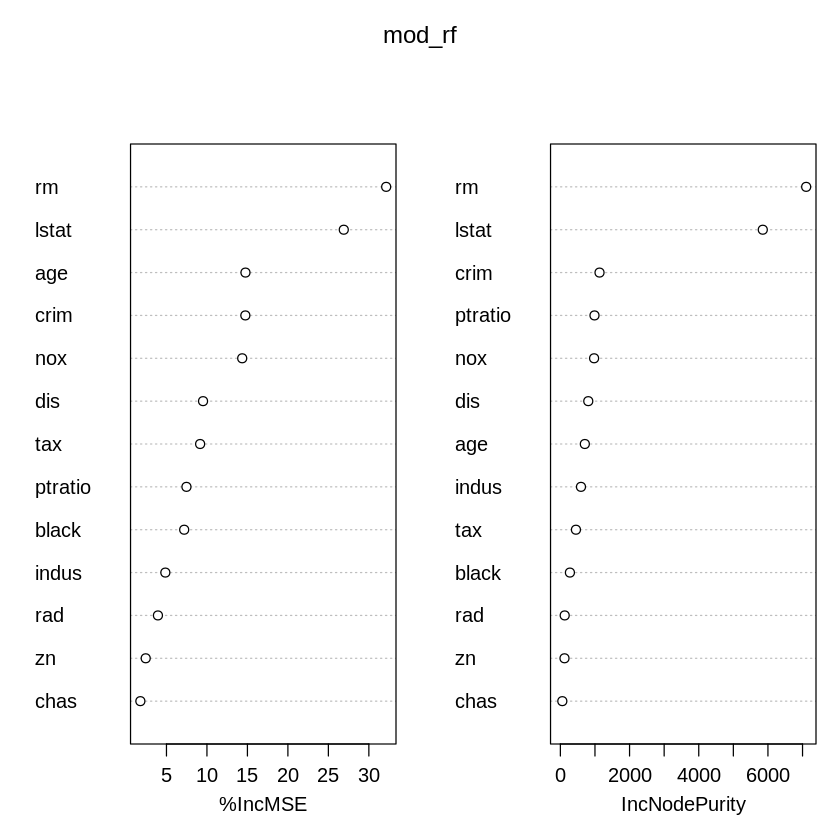

In [15]:
varImpPlot(mod_rf)